# Juan Manuel Deutsch, Cesar Felipe Giraldo, Julian Felipe Pulido

# Exercise 1

## 1.1)


Para este ejercicio tenemos $X$ siendo la matriz base y $Σ$ como la matriz de covarianza de $X$

Tambien tenemos los componentes principales $u_1, u_2,...,u_n$, que son los autovectores o vectores propios de $Σ$ que tienen varianzas asociadas $u_i^TΣu_i$, donde $u_i^T$ es la transpuesta del vector propio $u_i$

Ahora tendremos una tranformación lineal de los datos $X$, siendo $AX$ donde $A$ es una transformación $m x m$

Ahora con la matriz transformada tenemos la matriz de covarianza transformada $AΣA^T$ cuyos componentes principales estan dados por $v_1, v_2,...,v_n$ estos siendo los autovectores cuyas varianza asociadas estan dadas por $v_i^TAΣA^Tv_i$

Teniendo en cuenta que necesitamos demostrar los componentes principales y como cambian tenemos con relacion a $AX$ y $X$

$u_1$ siendo componente principal cuya varianza asociada es $u_i^TΣu_i$ y siendo $v_1$ el componente principal cuya varianza asociada es $v_i^TAΣA^Tv_i$

Teniendo en cuenta que $u_1$ y $v_1$ estan relacionados por una transformación lineal tenemos que $v_1 = Tu_1$ para una matriz T

Ahora, se puede escribir la varianza asociada de $v_1$ como:

$$v_1^TAΣA^Tv_1 = (Tu_1)^TAΣA^T(Tu_1) = u_1^TT^TAΣA^TTu_1$$

Dado que $T$ es una matriz de transformacion lineal, $T^TAΣA^TT$ es otra matriz de covarianza $Σ'$

Por lo tanto ahora tenemos:

$$v_1^TAΣA^Tv_1 = u_1^TΣ'u_1$$

Concluyendo con esta demostración, tenemos que la varianza asociada $v_1$ depende de la matriz de covarianza $Σ'$ que es una version transformada de la matriz de covarianza original $Σ$, por lo cual, $Σ'$ es diferente a $Σ$, entonces la varianza asociada a estos van a ser diferentes, por lo que un valor propio esta ligado conjunto de datos original y el otro valor propio esta ligado al conjunto transformado

## 1.2

Para esta demostracion tenemos $D$, como una matriz $f x c$ donde $f$ son filas y $c$ son columnas, ademas de $D'$ que es la matriz transformada con una transformación afin a una o mas columnas

Iniciando calculamos la matriz de correlación $corr(D)$
$$corr(D) = 1/n (D - D_u)^T(D - D_u)$$
Donde $D_u$ es la media de cada columna de $D$
De acuerdo a eso se los componentes principales por medio de $corr(D)$

Ahora realizamos el mismo proceso con la tranformación afin, que seria del siguiente modo:

$$D' = A*D+b$$

Donde $A$ es la transformación lineal y $b$ es el desplazamiento

Ahora calculamos la correlacion 

$$corr(D') = 1/n (D' - D'_u)^T(D' - D'_u)$$

Donde ahora $D'_u$ es la media de la matriz transformada, donde las columnas de $D'$ se ven afectadas por la transformación afin

Pero debemos tener en cuenta que para la covarianza los efectos de una transformación afin se dan de la siguiente forma:

$$cov(D') = A^Tcov(D)A$$

No obstante, estamos tratando es con matrices de correlación, las cuales son versiones escaladas de las matrices de covariaza, por lo cual la matriz de covarianza tambien afecta a la matriz de correlación con la misma transformación afin

Por lo cual los autovectores o vectores propios de $corr(D')$ son los mismos que $corr(D)$

# Exercise 2

### 2.1)

In [1]:

import numpy as np

def PCA(D, red):
    D.T
    mu = np.mean(D, axis=0)
    Z = D - mu
    cov_matrix = np.cov(Z, rowvar=False, bias=False)
    eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
    
    sorted_indices = np.argsort(eigenvalues)[::-1]

    topEigenvalues = eigenvalues[sorted_indices]
    topEigenVector = eigenvectors[:,sorted_indices]
    cumvariance = np.cumsum(topEigenvalues)
    
    if red < 1:
        total_variance = np.sum(topEigenvalues)
        cumvariance = np.cumsum(topEigenvalues)
        variance_top = red * total_variance
        numdims = np.argmax(cumvariance >= variance_top) + 1
    else:
        numdims = red
    top_eigenvectors = topEigenVector[:, :numdims] 
    total_variance = np.sum(topEigenvalues[:numdims]) 
    variance = total_variance / np.sum(topEigenvalues)
    A = np.dot(Z, top_eigenvectors)

    v = np.sum(topEigenvalues[:numdims])
    varianceTotal = np.sum(topEigenvalues)      


    
    return A, v, varianceTotal

D = np.array([[4, 1, 0, 9, 8],
 [9, 9, 1, 6, 1],
 [4, 5, 3, 3, 5],
 [6, 2, 7, 3, 8],
 [5, 1, 0, 8, 1],
 [0, 4, 4, 6, 3],
 [3, 3, 7, 6, 3],
 [0, 6, 9, 3, 4],
 [4, 5, 0, 1, 6],
 [6, 5, 1, 3, 1]])

A, variance, varTot = PCA(D, 4)
print(f'Datos reducidos A:\n {A}\n')
print(f'La varianza de la matriz A: {variance}')
print(f'La varianza de la matriz Total: {varTot}')

Datos reducidos A:
 [[ 2.22383293  6.62077922  0.9864382  -0.03164106]
 [ 5.55127862 -4.7594466  -0.5427392  -2.28080035]
 [-0.55058985 -0.98729531  1.77065664  0.80993837]
 [-3.68276669  1.36321497  3.73620713 -3.34999953]
 [ 4.37500465  2.74874794 -3.09709231 -0.07380571]
 [-2.10915442  0.84383508 -2.99845749  2.2964254 ]
 [-3.03064114  0.41677691 -2.57421906 -1.72366106]
 [-6.92241058 -2.45359706 -1.51927006  0.63565965]
 [ 1.04675051 -0.9551932   4.22672217  3.08842427]
 [ 3.09869596 -2.83782195  0.01175398  0.62946002]]

La varianza de la matriz A: 37.02020528711314
La varianza de la matriz Total: 38.99999999999999


### 2.2)

##### Preparación de datos

In [6]:
import pandas as pd
import numpy as np
import time

iris_data = pd.read_csv('iris.csv')
baseball_data = pd.read_csv('baseball_numeric.csv')
fabert_data = pd.read_csv('fabert.csv')
amazon_data = pd.read_csv('amazon.csv')


adf2 = amazon_data.drop('Class', axis=1)
fdf2 = fabert_data.drop('class', axis=1)
idf2 = iris_data.drop('species', axis=1)
bndf = baseball_data

adf3 = amazon_data.drop('Class', axis=1).values
fdf3 = fabert_data.drop('class', axis=1).values
idf3 = iris_data.drop('species', axis=1).values
bndf3 = baseball_data.values

datasets = [bndf3, fdf3, idf3, adf3]
data_dict = ['Baseball Dataset', 'Fabert Dataset', 'Iris Dataset', 'Amazon Dataset']

datasetsDictionary = {'Iris': iris_data, 'Baseball Numeric': baseball_data, 'Fabert': fabert_data, 'Amazon': amazon_data}
datasetsDictionary2 = {'Iris': idf2, 'Basebal Numeric': bndf, 'Fabert': fdf2, 'Amazon': adf2}
datasetsDictionary3 = {'Iris': idf2, 'Basebal Numeric': bndf, 'Fabert': fdf2}

##### a)

In [3]:
import timeit
import numpy as np
import pandas as pd



def getStats(A):
    start = timeit.default_timer()
    #Media
    mu = list(sum(row)/len(row) for row in zip(*A))
    #Covarianza
    n = A.shape[0]
    cov_mu = A - mu
    cov = np.dot(cov_mu.T, cov_mu) / (n)
    return mu, cov, timeit.default_timer() - start

def getStatsNumpy(A):
    start = timeit.default_timer()
    mu = np.mean(A, axis=0)
    cov = np.cov(A, rowvar=False, bias=False)
    return mu, cov, timeit.default_timer() - start


all_results = []

for dataset in datasets:
    combined_results = np.array([getStats(dataset)[2], getStatsNumpy(dataset)[2]]) 
    all_results.append(combined_results)

df = pd.DataFrame(all_results, index = data_dict, columns=['Nuestra función', 'Función de numpy'])
display(df) 

,Nuestra función,Función de numpy
Baseball Dataset,0.007107,0.001044
Fabert Dataset,0.610994,0.116386
Iris Dataset,0.000433,0.000516
Amazon Dataset,4.608515,3.201805


##### b)

In [21]:
import numpy as np
import pandas as pd

results = []

for dataset_name, dataset in datasetsDictionary2.items():
    
    numeric_dataset = dataset.select_dtypes(include=[float])
    A = numeric_dataset.values.astype(float)

    reduced_data, variance, varianceAbsolute = PCA(dataset, 0.9)
    
    total_variance_original = np.sum(np.linalg.eigvals(np.cov(A, rowvar=False)))
    
    
    if total_variance_original != 0:
        relative_total_variance = variance / total_variance_original
    else:
        relative_total_variance = np.nan 
    
    results.append({'Dataset': dataset_name, 'Dimensiones': reduced_data.shape[1], 'Varianza total absoluta': variance, 'Varianza Total Relativa': relative_total_variance})

results_df = pd.DataFrame(results)
print(results_df)


           Dataset  Dimensiones  Varianza total absoluta  \
0             Iris            1                 4.224841   
1  Basebal Numeric            2             17228.155686   
2           Fabert          516                 2.509025   
3           Amazon          197             12155.426523   

   Varianza Total Relativa  
0                 0.924616  
1                 0.989389  
2                 0.902976  
3                      NaN  


##### c)

1 Dimension


,Dataset,Varianza Original (1D),Varianza Reducida (1D),Porcentaje Mantenido
0,Iris,4.569291,4.224841,92.461621
1,Basebal Numeric,17412.919967,11828.850399,67.931458
2,Fabert,2.786623,0.024487,0.878742


2 Dimension


,Dataset,Varianza Original (2D),Varianza Reducida (2D),Porcentaje Mantenido
0,Iris,4.569291,4.467084,97.763178
1,Basebal Numeric,17412.919967,17228.155686,98.938924
2,Fabert,2.786623,0.046585,1.671726


3 Dimension


,Dataset,Varianza Original (3D),Varianza Relativa (3D),Porcentaje Mantenido
0,Iris,4.569291,4.545608,99.481691
1,Basebal Numeric,17412.919967,17391.760998,99.878487
2,Fabert,2.786623,0.064043,2.298241


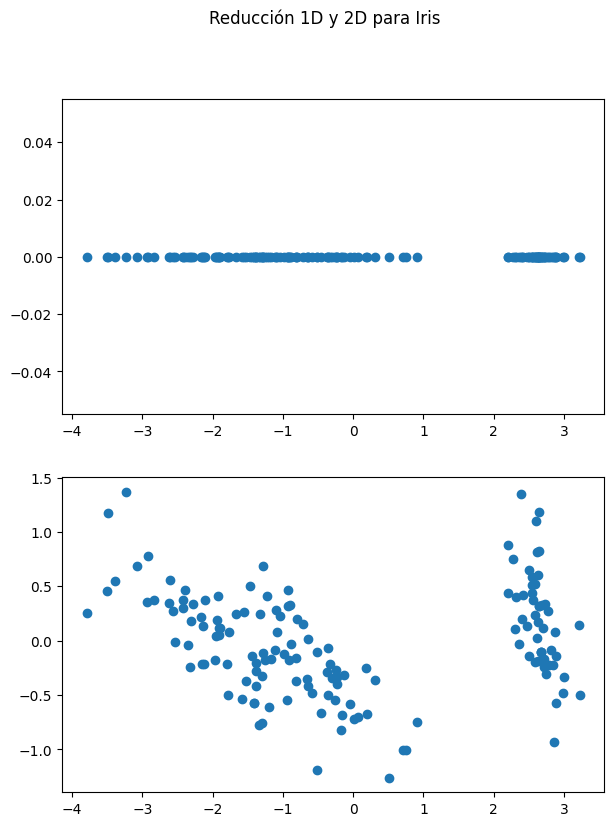

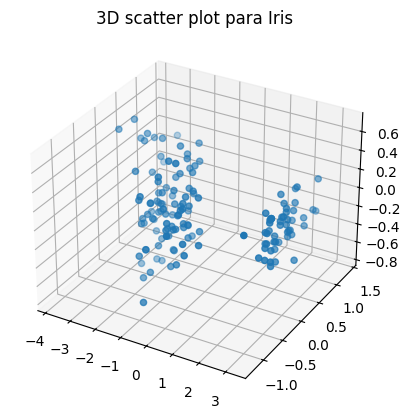

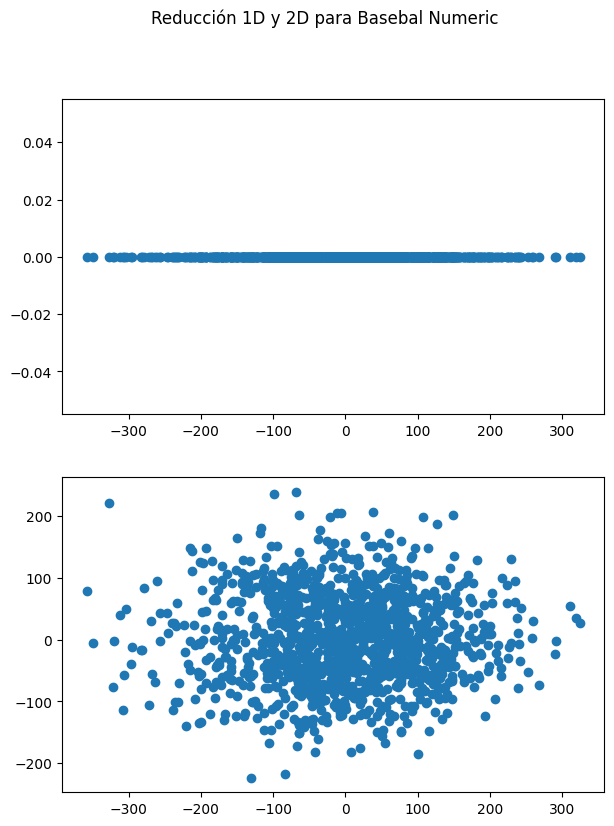

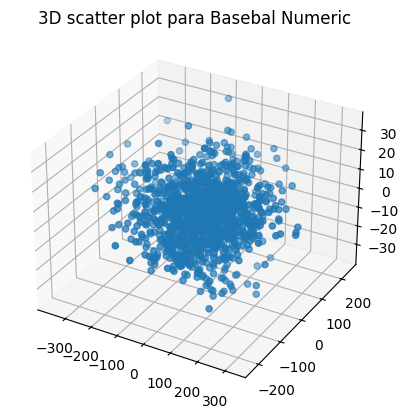

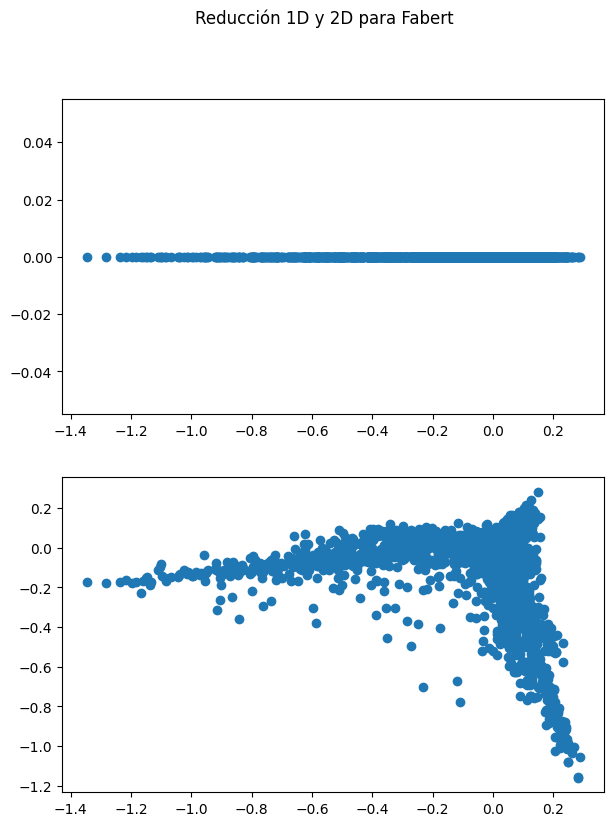

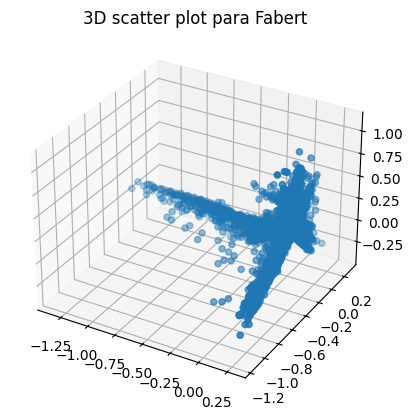

In [10]:
import matplotlib.pyplot as plt
results1D = []
results2D = []
results3D = []
for dataset_name, dataset in datasetsDictionary3.items():

    fig, axs = plt.subplots(2, figsize=(7, 9))
    fig.suptitle(f'Reducción 1D y 2D para {dataset_name}')
    
    varianceAbs = []
    variances = []
    relative_variances = []
    
    for i, n_components in enumerate([1, 2, 3]):

        reduced_data, total_variance, varianceAbsoluta = PCA(dataset, n_components)


        if(n_components == 1):
            
            axs[n_components-1].scatter(reduced_data, np.zeros(len(reduced_data)))
            
            
        elif(n_components == 2):
            axs[n_components-1].scatter(reduced_data[:, 0], reduced_data[:, 1])
        
        else:
            fig = plt.figure()
            ax = plt.axes(projection='3d')
            ax.scatter(reduced_data[:, 0], reduced_data[:, 1], reduced_data[:, 2])
            ax.set_title(f'3D scatter plot para {dataset_name}')
        

        relative_total_variance = total_variance / np.sum(np.linalg.eig(np.cov(dataset, rowvar=False, bias=False))[0])
        
        varianceAbs.append(varianceAbsoluta)
        variances.append(total_variance)
        relative_variances.append(relative_total_variance)
    
    results1D.append({'Dataset': dataset_name,
                    'Varianza Original (1D)': varianceAbs[0], 'Varianza Reducida (1D)': variances[0], 'Porcentaje Mantenido': relative_variances[0]*100})
    results2D.append({'Dataset': dataset_name,
                    'Varianza Original (2D)': varianceAbs[1], 'Varianza Reducida (2D)': variances[1], 'Porcentaje Mantenido': relative_variances[1]*100})
    results3D.append({'Dataset': dataset_name,
                    'Varianza Original (3D)': varianceAbs[2], 'Varianza Relativa (3D)': variances[2], 'Porcentaje Mantenido': relative_variances[2]*100})

results_df1 = pd.DataFrame(results1D)
results_df2 = pd.DataFrame(results2D)
results_df3 = pd.DataFrame(results3D)

print('1 Dimension')
display(results_df1)
print('2 Dimension')
display(results_df2)
print('3 Dimension')
display(results_df3)

In [4]:
import matplotlib.pyplot as plt
results1D = []
results2D = []
results3D = []

results_df1 = 0
results_df2 = 0
results_df3 = 0
varianceAbs = []
variances = []
relative_variances = []


idf3 = dataset
dataset_name = 'Amazon'

fig, axs = plt.subplots(2, figsize=(7, 9))
fig.suptitle(f'Reducción 1D y 2D para {dataset_name}')


for n_components in [1, 2, 3]:

    reduced_data, total_variance, varianceAbsoluta = PCA(dataset, n_components)
    

    if(n_components == 1):
        
        axs[n_components-1].scatter(reduced_data, np.zeros_like(reduced_data))
        
        
    elif(n_components == 2):
        axs[n_components-1].scatter(reduced_data[:, 0], reduced_data[:, 1])
    
    else:
        fig = plt.figure()
        ax = plt.axes(projection='3d')
        ax.scatter(reduced_data[:, 0], reduced_data[:, 1], reduced_data[:, 2])
        ax.set_title(f'3D scatter plot para {dataset_name}')
    

    relative_total_variance = total_variance / np.sum(np.linalg.eig(np.cov(dataset, rowvar=False, bias=False))[0])
    
    varianceAbs.append(varianceAbsoluta)
    variances.append(total_variance)
    relative_variances.append(relative_total_variance)

results1D.append({'Dataset': dataset_name,
                'Varianza Original (1D)': varianceAbs[0], 'Varianza Reducida (1D)': variances[0], 'Porcentaje Mantenido': relative_variances[0]*100})
results2D.append({'Dataset': dataset_name,
                'Varianza Original (2D)': varianceAbs[1], 'Varianza Reducida (2D)': variances[1], 'Porcentaje Mantenido': relative_variances[1]*100})
results3D.append({'Dataset': dataset_name,
                'Varianza Original (3D)': varianceAbs[2], 'Varianza Relativa (3D)': variances[2], 'Porcentaje Mantenido': relative_variances[2]*100})

results_df1 = pd.DataFrame(results1D)
results_df2 = pd.DataFrame(results2D)
results_df3 = pd.DataFrame(results3D)

print('1 Dimension')
display(results_df1)  
print('2 Dimension')
display(results_df2)
print('3 Dimension')
display(results_df3)   

NameError: name 'dataset' is not defined